# 클래스 (Object-Oriented Programming: 객체지향프로그래밍)

In [ ]:
# 클래스 정의
class TestClass:
  class_variable1 = 1
  class_variable2 = 2

# 인스턴스 생성
testInstance1 = TestClass()
testInstance2 = TestClass()

print(testInstance1.class_variable1) # 클래스 변수에는 '.' 통해 접근 가능
print(testInstance2.class_variable2)

1
2


In [ ]:
# 메서드(=클래스 내부의 함수) 정의
class TestClass2:
  class_variable = 3

  def classMethod1(self, num): # self? => 인스턴스를 의미 / 모든 메서드의 첫번째 인자는 self로 고정해야 함
    print(num+4)
    print(TestClass2.class_variable) # 함수 밖의 클래스 변수에 접근할 때에는 반드시 클래스 명 통해서

testInstance3 = TestClass2()
var = testInstance3.class_variable
testInstance3.classMethod1(5+var) # 메서드 역시 '.' 통해 접근 가능

12
3


In [ ]:
# 생성자 정의
class TestClass3:
  class_variable = 6

  def __init__(self, init_var): 
    '''
    <생성자 함수>
    (1) 이 클래스의 인스턴스가 생성되면 즉각 실행되는 함수
    (2) 이 클래스의 인스턴스를 생성할때 init_var에 해당하는 변수를 던져주어야 함
    '''

    method_var = TestClass3.class_variable # 이 변수는 이 함수 안에서만 사용 가능
    self.class_var = init_var # 'self.'이 앞에 붙은 변수는 클래스 내 다른 함수에서도 사용 가능

  def classMethod1(self, var):
    print(var * self.class_var)

testInstance4 = TestClass3(3)
testInstance4.classMethod1(7)

21


In [ ]:
# 메서드끼리 호출
class TestClass4:

  def __init__(self, a, b):
    self.a = a
    self.sum(a, b)

  def sum(self, a, b):
    print(a + b)
    self.mul(self.a)

  def mul(self, a, b = 3):
    print(a * b)

testInstance5 = TestClass4(23, 59)

82
69


In [ ]:
# 상속: 부모 클래스의 메서드 사용 가능
class ParentPortfolio:

  def __init__(self, stocks=True):
    print('Parent Part')
    self.stocks(stocks)

  def stocks(self, stocks):
    if stocks:
      print("Portfolio contains stocks")

class ChildPortfolio(ParentPortfolio): # 위의 클래스 상속 표시

  def __init__(self, stocks=True, bonds=True):
    super().__init__(stocks) # 부모 클래스 생성자에 필요한 변수 던져주기 (생략가능)
    ## super 사용시 부모 클래스 생성자 함수가 전체 실행됨
    print('Child Part')
    self.bonds(bonds)

  def bonds(self, bonds):
    if bonds:
      print("Portfolio contains bonds")

testInstance6 = ChildPortfolio(stocks=True, bonds=True)

Parent Part
Portfolio contains stocks
Child Part
Portfolio contains bonds


In [ ]:
# 메서드 Override
class Parent:

  def __init__(self, message):
    self.print_message(message)

  def print_message(self, message):
    print(message)

  def check(self):
    print('End of message')

class Child(Parent):

  def __init__(self, message):
    self.print_message(message)
    self.check()

  def print_message(self, message): # 부모 클래스의 동일 함수 override
    print("Start of message")
    print(message)

testInstance7 = Child('MESSAGE CONTENT')

Start of message
MESSAGE CONTENT
End of message


In [ ]:
# 복수 부모 클래스 상속 & 클래스 생성자의 변수로 인스턴스가 들어가는 경우

class OuterClass1:
    def __init__(self):
        print('outer 1')
        self.outer = 'outer1 var'

class OuterClass2:
    def __init__(self):
        print('outer 2')
        self.outer = 'outer2 var'
        
class OuterClass:
    def outer_func(self, var):
        return var + 2
    
class AnotherOuter:
    def outer_func(self, var):
        return var + 1
        
class Test(AnotherOuter, OuterClass): # AnotherOuter와 OuterClass 두 개 클래스를 상속
    def __init__(self, val, *obj_var):
        
        print(val) # (3) 생성자에 입력된 첫 변수 val이 print됨
        for obj in obj_var:
            print(obj.outer) # (4) ~ (5) obj_var에 담긴 변수들(=인스턴스들)에 접근, 'outer'라는 변수를 print
        
        ret = self.outer_func(33333333)
        print(ret) # (6) 상속된 메서드 outer_func를 호출 -> 두 개의 동일 이름 함수가 존재 -> 두 상속 클래스 중 첫 인자인 AnotherOuter의 함수가 호출됨

        li = [c.outer for c in obj_var]
        print(li) # (7) 응용
    
outerInst1 = OuterClass1() # (1) OuterClass1 클래스의 생성자가 실행되므로 'outer 1'이 print됨
outerInst2 = OuterClass2() # (2) OuterClass2 클래스의 생성자가 실행되므로 'outer 2'이 print됨
testInst = Test('some_additional_var', outerInst1, outerInst2) # val: 변수, *obj_var: 여러 변수 (이 경우, 인스턴스들)

outer 1
outer 2
some_additional_var
outer1 var
outer2 var
33333334
['outer1 var', 'outer2 var']


# OOP KEY TAKEAWAYS

(1) 인스턴스 생성 후 클래스 내부에서의 함수 호출 흐름도를 파악하는 것이 중요

(코드 에디터 IDE를 PyCharm을 쓰시는 경우 CTRL키를 누른 상태에서 클래스 내부 함수를 클릭하면 해당 함수가 정의된 코드로 이동합니다.)

(2) 설계 관점에서는 특정 기능 수행 함수와 이들 함수 간의 상호작용을 효율적으로 만드는 것이 중요

(3) 클래스 상속시 부모의 어느 기능을 사용할 것이고, 어느 기능을 바꿔서 쓸 것인지 목적에 맞게 결정하는 것이 중요

(4) 라이브러리들 역시 이러한 클래스-메서드 구조로 되어 있어 내부 메서드에 대한 이해도가 있으면 overriding을 통해 해당 라이브러리의 기능을 커스터마이징하는 것이 가능 (머신러닝/딥러닝 모델 구축 시 유용)

(5) 위의 OOP 개념 + 라이브러리(pandas, numpy 등) 통한 데이터 조작 = 백테스팅
(OOP 구조에서, 오가는 데이터 및 메서드 내부 연산이 모두 벡터~행렬 형태로 진행)

# Pandas 라이브러리

In [ ]:
## 아래의 코드로 pandas 라이브러리 설치
# !pip install pandas 

In [ ]:
import pandas as pd

# 데이터 소스 url
url = 'https://raw.githubusercontent.com/fr32code/backtest_skeleton/main/AAPL.csv'

# csv파일 -> DataFrame 형태로 전환
df = pd.read_csv(url).dropna()
print(df)

            Date   Open  ...  Sales Growth QOQ  Price to Book Value
0     2007-01-03   3.08  ...          0.470953             6.630880
1     2007-01-04   3.00  ...          0.470953             6.786119
2     2007-01-05   3.06  ...          0.470953             6.741765
3     2007-01-08   3.07  ...          0.470953             6.763942
4     2007-01-09   3.09  ...          0.470953             7.340540
...          ...    ...  ...               ...                  ...
3407  2020-07-16  96.56  ...          0.023528            23.681273
3408  2020-07-17  96.99  ...          0.023528            23.634657
3409  2020-07-20  96.42  ...          0.023528            24.132719
3410  2020-07-21  99.17  ...          0.023528            23.799042
3411  2020-07-22  96.69  ...          0.023528            23.865286

[3412 rows x 9 columns]


In [ ]:
# 행 index를 날짜로 변경
df.index = df['Date']

# 기존 날짜 열 제거
df = df.drop(columns=['Date'])
print(df)

             Open   High  ...  Sales Growth QOQ  Price to Book Value
Date                      ...                                       
2007-01-03   3.08   3.09  ...          0.470953             6.630880
2007-01-04   3.00   3.07  ...          0.470953             6.786119
2007-01-05   3.06   3.08  ...          0.470953             6.741765
2007-01-08   3.07   3.09  ...          0.470953             6.763942
2007-01-09   3.09   3.32  ...          0.470953             7.340540
...           ...    ...  ...               ...                  ...
2020-07-16  96.56  97.41  ...          0.023528            23.681273
2020-07-17  96.99  97.15  ...          0.023528            23.634657
2020-07-20  96.42  98.50  ...          0.023528            24.132719
2020-07-21  99.17  99.25  ...          0.023528            23.799042
2020-07-22  96.69  97.97  ...          0.023528            23.865286

[3412 rows x 8 columns]


In [ ]:
# 가격&거래량만 보기 위해 다른 열들 제거
df = df.drop(columns=['Net Profit Margin', 'Sales Growth QOQ', 'Price to Book Value'])
print(df)

             Open   High    Low  Close     Volume
Date                                             
2007-01-03   3.08   3.09   2.92   2.99   44225700
2007-01-04   3.00   3.07   2.99   3.06   30259300
2007-01-05   3.06   3.08   3.01   3.04   29812200
2007-01-08   3.07   3.09   3.05   3.05   28468100
2007-01-09   3.09   3.32   3.04   3.31  119617800
...           ...    ...    ...    ...        ...
2020-07-16  96.56  97.41  95.91  96.52   27645927
2020-07-17  96.99  97.15  95.84  96.33   23046755
2020-07-20  96.42  98.50  96.06  98.36   22397208
2020-07-21  99.17  99.25  96.74  97.00   25627347
2020-07-22  96.69  97.97  96.60  97.27   22250413

[3412 rows x 5 columns]


In [ ]:
# 인덱싱 (loc, iloc)
print(df.loc['2020-07-16']) # loc: 행에 접근

Open            96.56
High            97.41
Low             95.91
Close           96.52
Volume    27645927.00
Name: 2020-07-16, dtype: float64


In [ ]:
print(df.loc['2020-07-16':]) # 지정 행(포함) ~ 끝까지

             Open   High    Low  Close    Volume
Date                                            
2020-07-16  96.56  97.41  95.91  96.52  27645927
2020-07-17  96.99  97.15  95.84  96.33  23046755
2020-07-20  96.42  98.50  96.06  98.36  22397208
2020-07-21  99.17  99.25  96.74  97.00  25627347
2020-07-22  96.69  97.97  96.60  97.27  22250413


In [ ]:
print(df.loc[:'2007-01-09']) # 처음 ~ 지정 행(포함)

            Open  High   Low  Close     Volume
Date                                          
2007-01-03  3.08  3.09  2.92   2.99   44225700
2007-01-04  3.00  3.07  2.99   3.06   30259300
2007-01-05  3.06  3.08  3.01   3.04   29812200
2007-01-08  3.07  3.09  3.05   3.05   28468100
2007-01-09  3.09  3.32  3.04   3.31  119617800


In [ ]:
print(df.iloc[0, :]) # 첫 행에 접근 (: 표시로 모든 열 포함)

Open             3.08
High             3.09
Low              2.92
Close            2.99
Volume    44225700.00
Name: 2007-01-03, dtype: float64


In [ ]:
print(df.iloc[0:5, 0:4]) # 행: 0~4, 열: 0~3 (끝 포함 x)

            Open  High   Low  Close
Date                               
2007-01-03  3.08  3.09  2.92   2.99
2007-01-04  3.00  3.07  2.99   3.06
2007-01-05  3.06  3.08  3.01   3.04
2007-01-08  3.07  3.09  3.05   3.05
2007-01-09  3.09  3.32  3.04   3.31


In [ ]:
df_close = df['Close'] # 특정 열에 접근
print(df_close)

Date
2007-01-03     2.99
2007-01-04     3.06
2007-01-05     3.04
2007-01-08     3.05
2007-01-09     3.31
              ...  
2020-07-16    96.52
2020-07-17    96.33
2020-07-20    98.36
2020-07-21    97.00
2020-07-22    97.27
Name: Close, Length: 3412, dtype: float64


In [ ]:
df_close_pct = df_close.pct_change().fillna(0) # 일별 종가 기준 수익률 계산 (데이터 없는 첫날 0으로 대체)
print(df_close_pct)

Date
2007-01-03    0.000000
2007-01-04    0.023411
2007-01-05   -0.006536
2007-01-08    0.003289
2007-01-09    0.085246
                ...   
2020-07-16   -0.012280
2020-07-17   -0.001969
2020-07-20    0.021073
2020-07-21   -0.013827
2020-07-22    0.002784
Name: Close, Length: 3412, dtype: float64


# Pyfolio 라이브러리 활용 백테스팅 시각화 한줄 코드

In [ ]:
# 간단한 전략 백테스팅 시각화 진행
'''
(1) 종목: AAPL
(2) 기간: 20070103 ~ 20200722
(3) 전략: Buy & Hold
'''

!pip install git+https://github.com/quantopian/pyfolio --quiet
import pyfolio as pf

Start date,2007-01-03
End date,2020-07-22
Total months,162
,Backtest
Annual return,29.329%
Cumulative returns,3153.177%
Annual volatility,32.216%
Sharpe ratio,0.96
Calmar ratio,0.48
Stability,0.93
Max drawdown,-60.924%


Worst drawdown periods,Net drawdown in %,Peak date,Valley date,Recovery date,Duration
0,60.92,2007-12-28,2009-01-20,2009-10-21,474
1,44.36,2012-09-19,2013-04-19,2014-08-19,500
2,38.73,2018-10-03,2019-01-03,2019-10-11,268
3,32.06,2015-02-23,2016-05-12,2017-02-13,516
4,31.43,2020-02-12,2020-03-23,2020-06-05,83


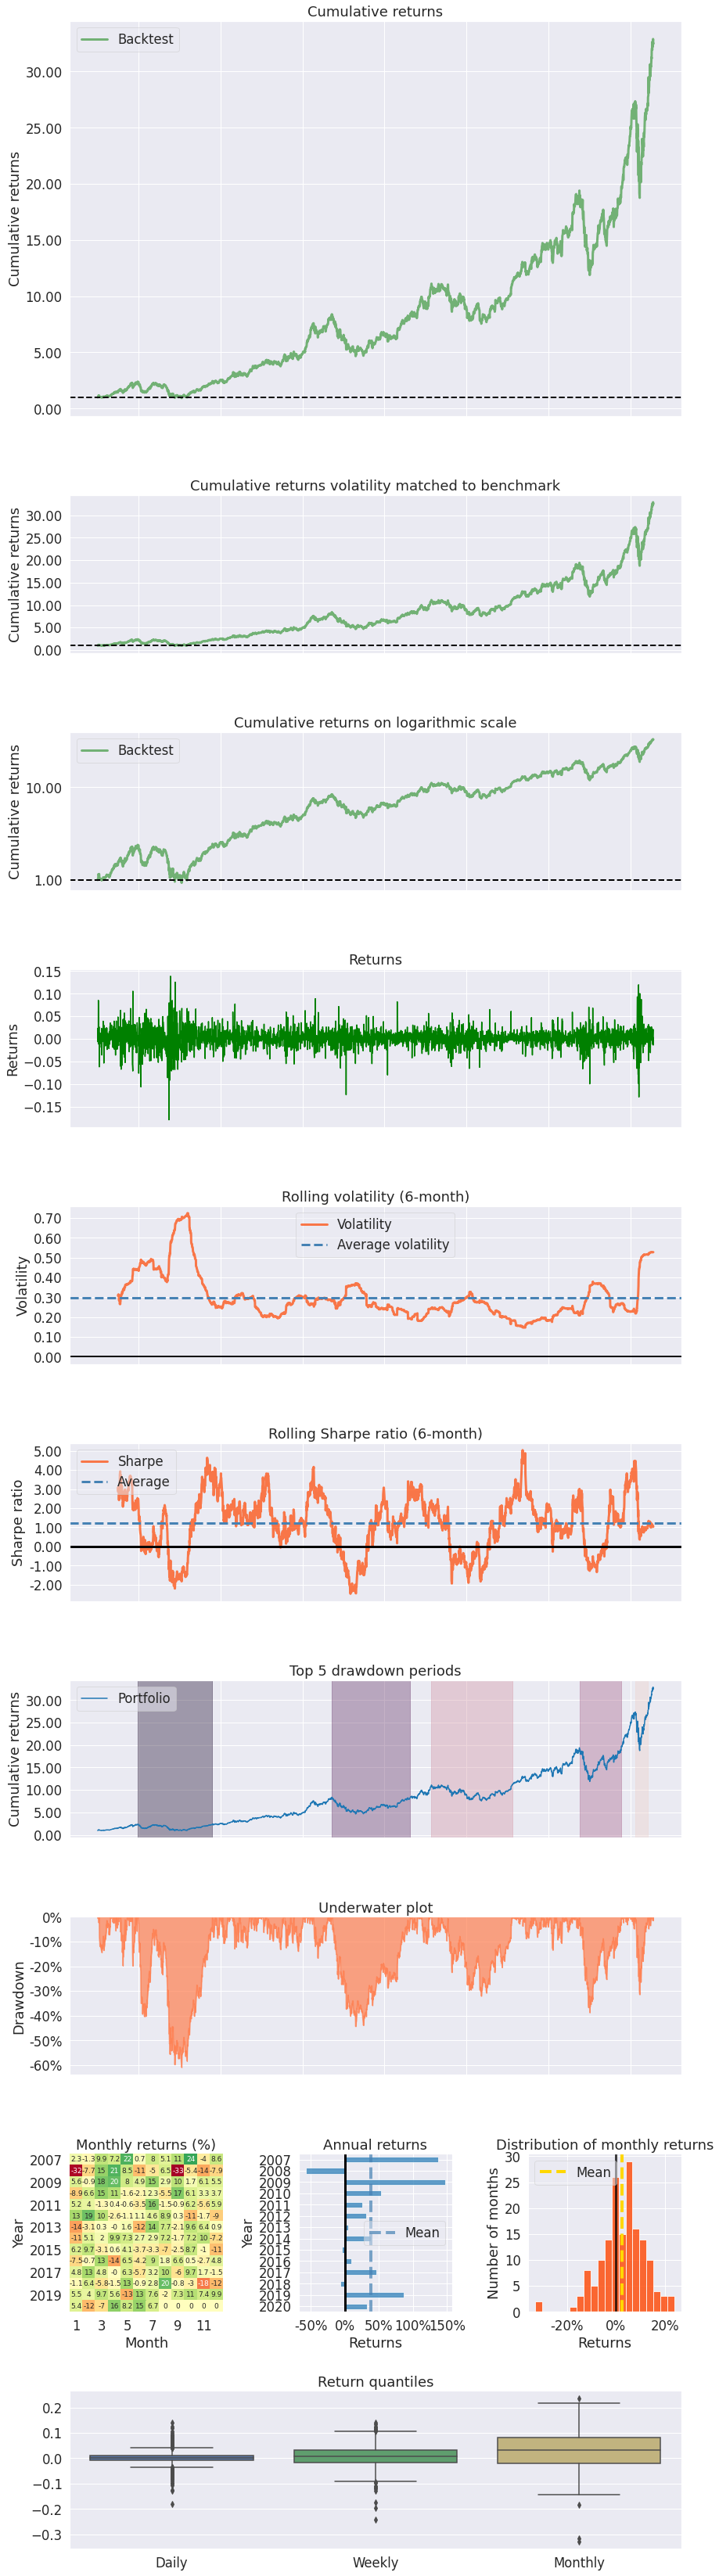

In [ ]:
# 백테스팅 진행 위해 인덱스 값들 string -> datetime 변환
df_close_pct.index = pd.to_datetime(df_close_pct.index)

# 백테스팅 시각화 한줄 코드
pf.create_returns_tear_sheet(df_close_pct)

# Pandas 라이브러리 (continued)

In [ ]:
# df 데이터 다시 확인
print(df)

             Open   High    Low  Close     Volume
Date                                             
2007-01-03   3.08   3.09   2.92   2.99   44225700
2007-01-04   3.00   3.07   2.99   3.06   30259300
2007-01-05   3.06   3.08   3.01   3.04   29812200
2007-01-08   3.07   3.09   3.05   3.05   28468100
2007-01-09   3.09   3.32   3.04   3.31  119617800
...           ...    ...    ...    ...        ...
2020-07-16  96.56  97.41  95.91  96.52   27645927
2020-07-17  96.99  97.15  95.84  96.33   23046755
2020-07-20  96.42  98.50  96.06  98.36   22397208
2020-07-21  99.17  99.25  96.74  97.00   25627347
2020-07-22  96.69  97.97  96.60  97.27   22250413

[3412 rows x 5 columns]


In [ ]:
# shift 연산
print(df.shift(3).fillna(0))
print(df.shift(-3).fillna(0))

             Open   High    Low  Close      Volume
Date                                              
2007-01-03   0.00   0.00   0.00   0.00         0.0
2007-01-04   0.00   0.00   0.00   0.00         0.0
2007-01-05   0.00   0.00   0.00   0.00         0.0
2007-01-08   3.08   3.09   2.92   2.99  44225700.0
2007-01-09   3.00   3.07   2.99   3.06  30259300.0
...           ...    ...    ...    ...         ...
2020-07-16  97.27  99.95  95.26  95.48  47913079.0
2020-07-17  94.84  97.25  93.88  97.06  42748119.0
2020-07-20  98.99  99.25  96.49  97.72  38306874.0
2020-07-21  96.56  97.41  95.91  96.52  27645927.0
2020-07-22  96.99  97.15  95.84  96.33  23046755.0

[3412 rows x 5 columns]
             Open   High    Low  Close       Volume
Date                                               
2007-01-03   3.07   3.09   3.05   3.05   28468100.0
2007-01-04   3.09   3.32   3.04   3.31  119617800.0
2007-01-05   3.38   3.49   3.34   3.46  105460000.0
2007-01-08   3.43   3.46   3.40   3.42   51437600.0


In [ ]:
# 가격 df 복제 껍데기 DataFrame 생성
df = df.drop(columns=['Volume'])
df2 = pd.DataFrame(index=df.index, columns=df.columns).fillna(value=1)
print(df2)

            Open  High  Low  Close
Date                              
2007-01-03     1     1    1      1
2007-01-04     1     1    1      1
2007-01-05     1     1    1      1
2007-01-08     1     1    1      1
2007-01-09     1     1    1      1
...          ...   ...  ...    ...
2020-07-16     1     1    1      1
2020-07-17     1     1    1      1
2020-07-20     1     1    1      1
2020-07-21     1     1    1      1
2020-07-22     1     1    1      1

[3412 rows x 4 columns]


In [ ]:
# Bulk 단위 계산 (행, 열 단위)
df3 = df.div(df.sum(axis=1), axis=0)
print(df3)

                Open      High       Low     Close
Date                                              
2007-01-03  0.254967  0.255795  0.241722  0.247517
2007-01-04  0.247525  0.253300  0.246700  0.252475
2007-01-05  0.251025  0.252666  0.246924  0.249385
2007-01-08  0.250408  0.252039  0.248777  0.248777
2007-01-09  0.242163  0.260188  0.238245  0.259404
...              ...       ...       ...       ...
2020-07-16  0.249896  0.252096  0.248214  0.249793
2020-07-17  0.251068  0.251482  0.248091  0.249359
2020-07-20  0.247650  0.252992  0.246725  0.252633
2020-07-21  0.252881  0.253085  0.246685  0.247348
2020-07-22  0.248861  0.252156  0.248629  0.250354

[3412 rows x 4 columns]


In [ ]:
print(df2 + df3)
print(df2 * df3)

                Open      High       Low     Close
Date                                              
2007-01-03  1.254967  1.255795  1.241722  1.247517
2007-01-04  1.247525  1.253300  1.246700  1.252475
2007-01-05  1.251025  1.252666  1.246924  1.249385
2007-01-08  1.250408  1.252039  1.248777  1.248777
2007-01-09  1.242163  1.260188  1.238245  1.259404
...              ...       ...       ...       ...
2020-07-16  1.249896  1.252096  1.248214  1.249793
2020-07-17  1.251068  1.251482  1.248091  1.249359
2020-07-20  1.247650  1.252992  1.246725  1.252633
2020-07-21  1.252881  1.253085  1.246685  1.247348
2020-07-22  1.248861  1.252156  1.248629  1.250354

[3412 rows x 4 columns]
                Open      High       Low     Close
Date                                              
2007-01-03  0.254967  0.255795  0.241722  0.247517
2007-01-04  0.247525  0.253300  0.246700  0.252475
2007-01-05  0.251025  0.252666  0.246924  0.249385
2007-01-08  0.250408  0.252039  0.248777  0.248777
2007-0

In [ ]:
# Bulk로 True, False 시그널 생성 방법
def signal_converter(bool_var):
  if bool_var:
    result = 1
  else:
    result = 0
  return result

df4 = (df3 > 0.25).applymap(signal_converter)
print(df4)

            Open  High  Low  Close
Date                              
2007-01-03     1     1    0      0
2007-01-04     0     1    0      1
2007-01-05     1     1    0      0
2007-01-08     1     1    0      0
2007-01-09     0     1    0      1
...          ...   ...  ...    ...
2020-07-16     0     1    0      0
2020-07-17     1     1    0      0
2020-07-20     0     1    0      1
2020-07-21     1     1    0      0
2020-07-22     0     1    0      1

[3412 rows x 4 columns]


In [ ]:
# Series의 경우 applymap 대신 map 사용